<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-mining-college-task/blob/main/Tgs_Kel_Data_Mining_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

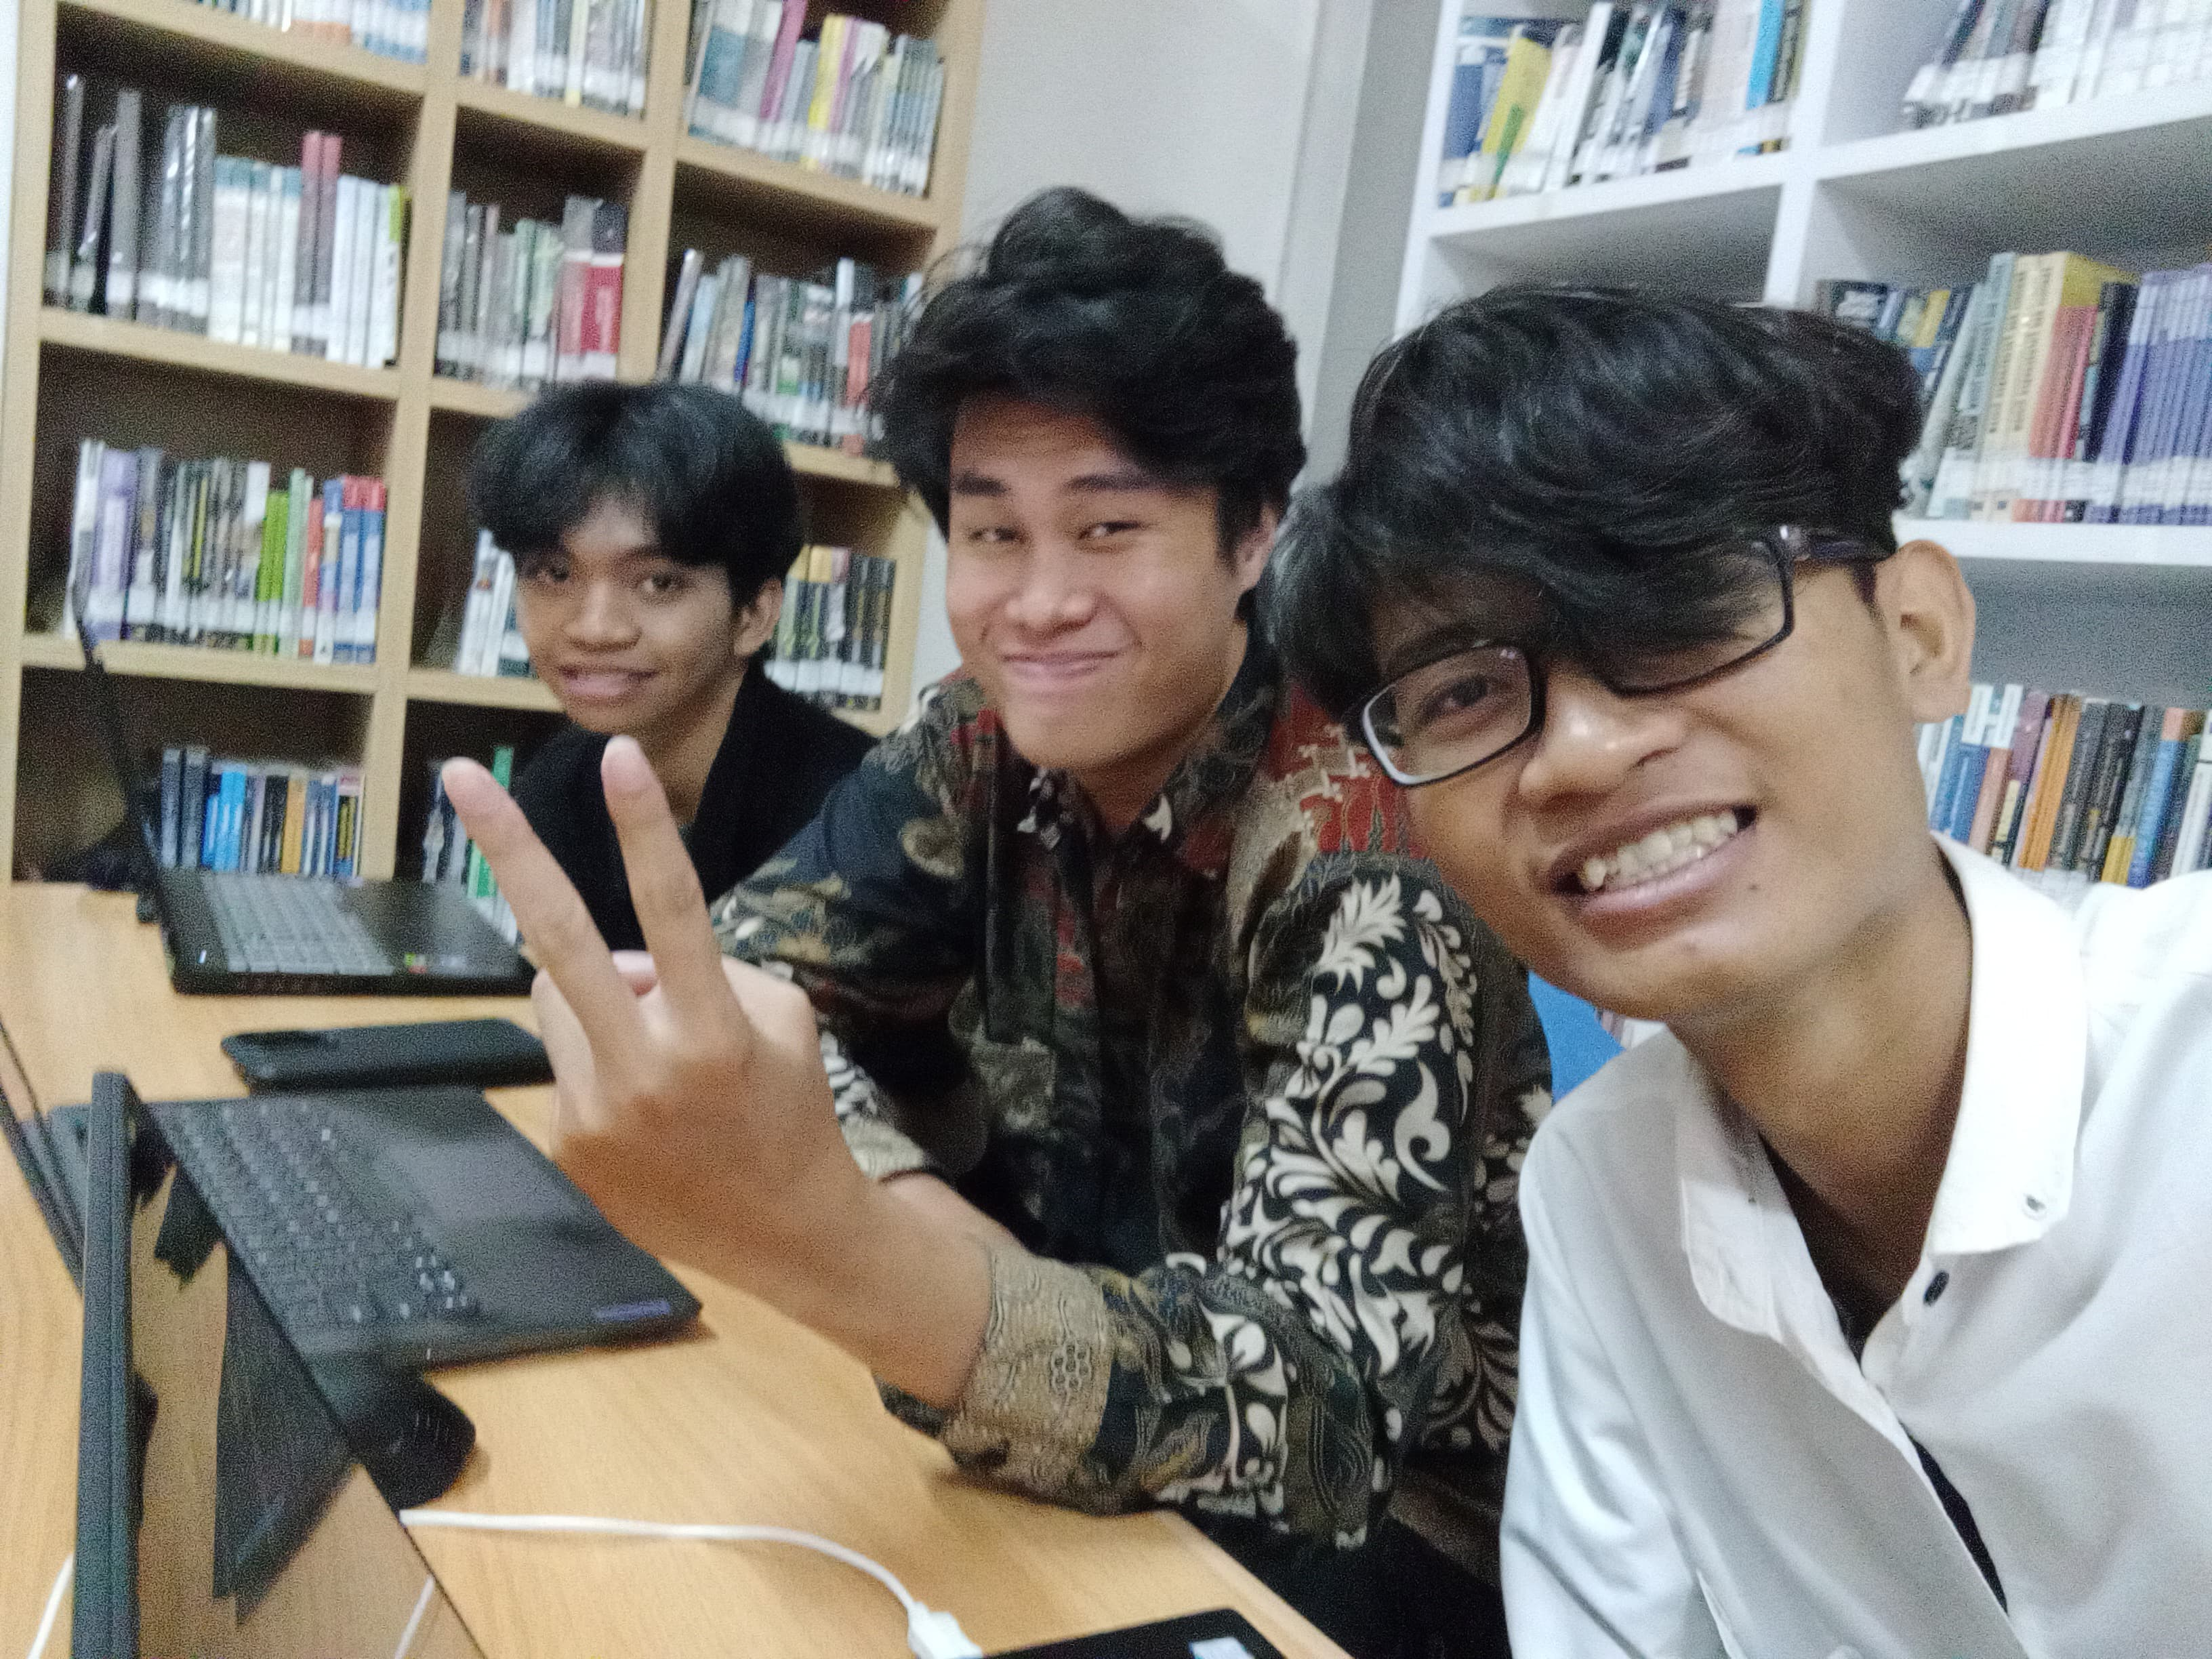

**Dataset Title       : Retail Supermarket**

**Dataset Source Link   :** https://www.kaggle.com/datasets/roopacalistus/superstore/code



## **1. Import Library**

In [3]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd

## **2. Load Dataset ke Colab**

In [5]:
file_path = 'SampleSuperstore.csv'
data = pd.read_csv(file_path)
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Mengecek apakah ada missing value:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
# Menampilkan seluruh kategori untuk kolom bertipe objek
category_columns = data.select_dtypes(include='object').columns
print("Display All Unique Categories (for Categorical Columns):")
for column in category_columns:
    unique_values = data[column].unique()
    print(f"- {column}: {unique_values}")

Display All Unique Categories (for Categorical Columns):
- Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
- Segment: ['Consumer' 'Corporate' 'Home Office']
- Country: ['United States']
- City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Sa

In [11]:
# Menampilkan rentang nilai untuk kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nDisplay the Range of Values (for Numeric Columns):")
for column in numeric_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"- {column}: Min = {min_value}, Max = {max_value}")


Display the Range of Values (for Numeric Columns):
- Postal Code: Min = 1040, Max = 99301
- Sales: Min = 0.444, Max = 22638.48
- Quantity: Min = 1, Max = 14
- Discount: Min = 0.0, Max = 0.8
- Profit: Min = -6599.978, Max = 8399.976


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## **3. Menentukan 3 Subject yang Tersimpan dalam Data Warhouse**

**A. Membuat Database SQLite (*Create an SQLite database*)**

In [ ]:
engine = create_engine('sqlite:///superstore_data_warehouse.db')

**B. Membuat Tabel Dimensi (Create dimensional tables)**

In [ ]:
dim_customer = data[['Segment', 'Country', 'City', 'State', 'Postal Code', 'Region']].drop_duplicates()
dim_customer.reset_index(drop=True, inplace=True)
dim_customer['CustomerID'] = dim_customer.index + 1

In [ ]:
dim_product = data[['Category', 'Sub-Category']].drop_duplicates()
dim_product.reset_index(drop=True, inplace=True)
dim_product['ProductID'] = dim_product.index + 1

dim_shipping = data[['Ship Mode']].drop_duplicates()
dim_shipping.reset_index(drop=True, inplace=True)
dim_shipping['ShippingID'] = dim_shipping.index + 1

**C. Membuat Table Fakta (*Create fact table by merging IDs from dimension tables*)**

In [ ]:
fact_sales = data.merge(dim_customer, how='left', on=['Segment', 'Country', 'City', 'State', 'Postal Code', 'Region'])
fact_sales = fact_sales.merge(dim_product, how='left', on=['Category', 'Sub-Category'])
fact_sales = fact_sales.merge(dim_shipping, how='left', on=['Ship Mode'])

fact_sales = fact_sales[['CustomerID', 'ProductID', 'ShippingID', 'Sales', 'Quantity', 'Discount', 'Profit']]

**D. Menyimpan ke SQLite (*Save tables to SQLite database*)**


In [ ]:
dim_customer.to_sql('dim_customer', engine, index=False, if_exists='replace')
dim_product.to_sql('dim_product', engine, index=False, if_exists='replace')
dim_shipping.to_sql('dim_shipping', engine, index=False, if_exists='replace')
fact_sales.to_sql('fact_sales', engine, index=False, if_exists='replace')

9994

In [ ]:
print("Data warehouse created successfully with the following tables:")
print("- dim_customer")
print("- dim_product")
print("- dim_shipping")
print("- fact_sales")

Data warehouse created successfully with the following tables:
- dim_customer
- dim_product
- dim_shipping
- fact_sales


**E. Validasi Tabel (*Validation Queries*)**


In [ ]:
def validate_tables():
    conn = sqlite3.connect('superstore_data_warehouse.db')
    print("\nSample from dim_customer:")
    print(pd.read_sql_query("SELECT * FROM dim_customer LIMIT 5;", conn))

    print("\nSample from dim_product:")
    print(pd.read_sql_query("SELECT * FROM dim_product LIMIT 5;", conn))

    print("\nSample from dim_shipping:")
    print(pd.read_sql_query("SELECT * FROM dim_shipping LIMIT 5;", conn))

    print("\nSample from fact_sales:")
    print(pd.read_sql_query("SELECT * FROM fact_sales LIMIT 5;", conn))
    conn.close()

# Run validation
validate_tables()


Sample from dim_customer:
     Segment        Country             City           State  Postal Code  \
0   Consumer  United States        Henderson        Kentucky        42420   
1  Corporate  United States      Los Angeles      California        90036   
2   Consumer  United States  Fort Lauderdale         Florida        33311   
3   Consumer  United States      Los Angeles      California        90032   
4   Consumer  United States          Concord  North Carolina        28027   

  Region  CustomerID  
0  South           1  
1   West           2  
2  South           3  
3   West           4  
4  South           5  

Sample from dim_product:
          Category Sub-Category  ProductID
0        Furniture    Bookcases          1
1        Furniture       Chairs          2
2  Office Supplies       Labels          3
3        Furniture       Tables          4
4  Office Supplies      Storage          5

Sample from dim_shipping:
        Ship Mode  ShippingID
0    Second Class           1
1

## **4. OLAP(Online Analytical Processing)**

**A. Connect to the SQLite database**

In [ ]:
conn = sqlite3.connect('superstore_data_warehouse.db')
cursor = conn.cursor()

**B. Roll-Up: Total Sales by Region**

In [ ]:
query_roll_up_region = """
SELECT c.Region, SUM(s.Sales) AS TotalSales
FROM fact_sales s
JOIN dim_customer c ON s.CustomerID = c.CustomerID
GROUP BY c.Region
ORDER BY TotalSales DESC;
"""
df_roll_up_region = pd.read_sql_query(query_roll_up_region, conn)
print("\n[Roll-Up] Total Sales by Region:")
print(df_roll_up_region)


[Roll-Up] Total Sales by Region:
    Region   TotalSales
0     West  725457.8245
1     East  678781.2400
2  Central  501239.8908
3    South  391721.9050


**C. Drill-Down: Total Sales by State within a Specific Region (e.g., West)**

In [ ]:
query_drill_down_state = """
SELECT c.State, SUM(s.Sales) AS TotalSales
FROM fact_sales s
JOIN dim_customer c ON s.CustomerID = c.CustomerID
WHERE c.Region = 'West'
GROUP BY c.State
ORDER BY TotalSales DESC;
"""
df_drill_down_state = pd.read_sql_query(query_drill_down_state, conn)
print("\n[Drill-Down] Total Sales by State in the West Region:")
print(df_drill_down_state)


[Drill-Down] Total Sales by State in the West Region:
         State   TotalSales
0   California  457687.6315
1   Washington  138641.2700
2      Arizona   35282.0010
3     Colorado   32108.1180
4       Oregon   17431.1500
5       Nevada   16729.1020
6         Utah   11220.0560
7      Montana    5589.3520
8   New Mexico    4783.5220
9        Idaho    4382.4860
10     Wyoming    1603.1360


**D. Slice: Sales and Profit for All Categories**


In [ ]:
query_slice_all_categories = """
SELECT p.Category, SUM(s.Sales) AS TotalSales, SUM(s.Profit) AS TotalProfit
FROM fact_sales s
JOIN dim_product p ON s.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY TotalSales DESC;
"""
df_slice_all_categories = pd.read_sql_query(query_slice_all_categories, conn)
print("\n[Slice] Sales and Profit for All Categories:")
print(df_slice_all_categories)


[Slice] Sales and Profit for All Categories:
          Category   TotalSales  TotalProfit
0       Technology  836154.0330  145454.9481
1        Furniture  741999.7953   18451.2728
2  Office Supplies  719047.0320  122490.8008


**E. Dice: Sales by Category and Region with High Profit (> 50)**


In [ ]:
query_dice_category_region = """
SELECT p.Category, c.Region, SUM(s.Sales) AS TotalSales
FROM fact_sales s
JOIN dim_product p ON s.ProductID = p.ProductID
JOIN dim_customer c ON s.CustomerID = c.CustomerID
WHERE s.Profit > 50
GROUP BY p.Category, c.Region
ORDER BY TotalSales DESC;
"""
df_dice_category_region = pd.read_sql_query(query_dice_category_region, conn)
print("\n[Dice] Sales by Category and Region (Profit > 50):")
print(df_dice_category_region)


[Dice] Sales by Category and Region (Profit > 50):
           Category   Region   TotalSales
0        Technology     East  201723.7420
1        Technology     West  187392.9560
2   Office Supplies     West  133656.1000
3         Furniture     West  126119.4645
4   Office Supplies     East  118505.0280
5        Technology  Central  114912.1310
6        Technology    South   92912.1820
7   Office Supplies  Central   91957.9660
8         Furniture     East   89003.5090
9   Office Supplies    South   68026.3780
10        Furniture    South   65039.0580
11        Furniture  Central   63273.9500


**F. Drill-Across: Compare Total Sales and Total Profit Across Regions**

In [ ]:
query_drill_across = """
SELECT c.Region, SUM(s.Sales) AS TotalSales, SUM(s.Profit) AS TotalProfit
FROM fact_sales s
JOIN dim_customer c ON s.CustomerID = c.CustomerID
GROUP BY c.Region
ORDER BY TotalSales DESC;
"""
df_drill_across = pd.read_sql_query(query_drill_across, conn)
print("\n[Drill-Across] Total Sales and Total Profit by Region:")
print(df_drill_across)


[Drill-Across] Total Sales and Total Profit by Region:
    Region   TotalSales  TotalProfit
0     West  725457.8245  108418.4489
1     East  678781.2400   91522.7800
2  Central  501239.8908   39706.3625
3    South  391721.9050   46749.4303


**G. Roll-Up: Total Quantity Sold by Category**


In [ ]:
query_roll_up_category = """
SELECT p.Category, SUM(s.Quantity) AS TotalQuantitySold
FROM fact_sales s
JOIN dim_product p ON s.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY TotalQuantitySold DESC;
"""
df_roll_up_category = pd.read_sql_query(query_roll_up_category, conn)
print("\n[Roll-Up] Total Quantity Sold by Category:")
print(df_roll_up_category)


[Roll-Up] Total Quantity Sold by Category:
          Category  TotalQuantitySold
0  Office Supplies              22906
1        Furniture               8028
2       Technology               6939


**H. Close the connection**


In [ ]:
conn.close()